In [1]:
from src.feverous.utils.wiki_window import *
from src.feverous.utils.wiki_row import *

In [2]:
from src.feverous.database.feverous_db import FeverousDB
import numpy as np

In [3]:
db =  FeverousDB("/mnt/infonas/data/harshiitb/MTP/MTP/FEVER/FEVEROUS-main/data/feverous_wikiv1.db")

In [4]:
title = '! (Cláudia Pascoal album)'
page_json = db.get_doc_json(title)
'''
    Once we have the json, we create object of WikiPage
        input: title T, json of wikipage under consideration
        output: object of WikiPage
    WikiPage provides various functionalities that can be used to read the underlying wikipage:
        get_sentences()
        get_context()
        ...etc
'''
wiki_page = WikiPage(title, page_json)

In [5]:
window_obj = wiki_window(wiki_page)

In [6]:
window_obj.get_all_windows()

{'! (Cláudia Pascoal album)|window_intro_0': ['sentence_0',
  'sentence_1',
  'sentence_2',
  'sentence_3']}

In [7]:
window_obj.get_window_content_and_context('! (Cláudia Pascoal album)|window_intro_0')

'! (Cláudia Pascoal album) ! (pronounced "") is the debut [[Studio_album|studio album]] by Portuguese singer [[Cláudia_Pascoal|Cláudia Pascoal]]. It was released in Portugal on 27 March 2020 by Universal Music Portugal. The album peaked at number six on the [[Associação_Fonográfica_Portuguesa|Portuguese Albums Chart]].'

In [5]:
row_obj = wiki_row(wiki_page)

In [6]:
row_obj.get_all_rows()

{'! (Cláudia Pascoal album)|table_0_ 0': ['header_cell_0_0_0',
  'header_cell_0_0_0'],
 '! (Cláudia Pascoal album)|table_0_ 1': ['header_cell_0_1_0',
  'header_cell_0_1_0'],
 '! (Cláudia Pascoal album)|table_0_ 2': ['header_cell_0_2_0', 'cell_0_2_1'],
 '! (Cláudia Pascoal album)|table_0_ 3': ['header_cell_0_3_0', 'cell_0_3_1'],
 '! (Cláudia Pascoal album)|table_0_ 4': ['header_cell_0_4_0', 'cell_0_4_1'],
 '! (Cláudia Pascoal album)|table_0_ 5': ['header_cell_0_5_0',
  'header_cell_0_5_0'],
 '! (Cláudia Pascoal album)|table_1_ 0': ['header_cell_1_0_0',
  'header_cell_1_0_1'],
 '! (Cláudia Pascoal album)|table_1_ 1': ['header_cell_1_1_0', 'cell_1_1_1'],
 '! (Cláudia Pascoal album)|table_2_ 0': ['header_cell_2_0_0',
  'header_cell_2_0_1',
  'header_cell_2_0_2',
  'header_cell_2_0_3'],
 '! (Cláudia Pascoal album)|table_2_ 1': ['header_cell_2_1_0',
  'cell_2_1_1',
  'cell_2_1_2',
  'cell_2_1_3']}

In [7]:
row_obj.get_row_content_and_context('! (Cláudia Pascoal album)|table_2_ 1')

['header_cell_2_1_0', 'cell_2_1_1', 'cell_2_1_2', 'cell_2_1_3']
header_cell_2_1_0
cell_2_1_1
cell_2_1_2
cell_2_1_3


'! (Cláudia Pascoal album) Release history Region Portugal Date 27 March 2020 Format  Label Universal Music Portugal'

In [8]:
#Let's try ELQ

In [9]:
row_graph = row_obj.get_row_graph('! (Cláudia Pascoal album)|table_2_ 1')

In [12]:
row_graph[0]

{'! (Cláudia Pascoal album)|header_cell_2_1_0': 'Portugal',
 '! (Cláudia Pascoal album)|header_cell_2_0_0': 'Region',
 '! (Cláudia Pascoal album)|cell_2_1_1': '27 March 2020',
 '! (Cláudia Pascoal album)|header_cell_2_0_1': 'Date',
 '! (Cláudia Pascoal album)|cell_2_1_2': '',
 '! (Cláudia Pascoal album)|header_cell_2_0_2': 'Format',
 '! (Cláudia Pascoal album)|cell_2_1_3': 'Universal Music Portugal',
 '! (Cláudia Pascoal album)|header_cell_2_0_3': 'Label',
 '! (Cláudia Pascoal album)|! (Cláudia Pascoal album)|table_2_ 1': ''}

In [13]:
import networkx as nx
import matplotlib.pyplot as plt


In [14]:
G = nx.Graph()

In [15]:
for node,content in row_graph[0].items():
    G.add_node(node)
    G.nodes[node]['content'] = content

In [17]:
for edge in row_graph[1]:
    G.add_edge(edge[0], edge[1])

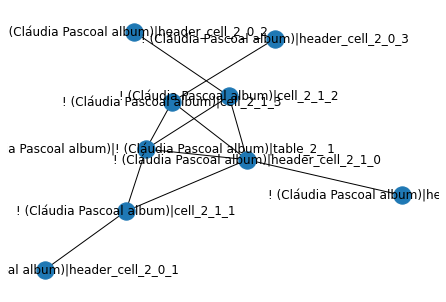

In [23]:
nx.draw(G , with_labels = True)
plt.savefig("row.png")
plt.show()

In [20]:
plt.savefig("row.png")

<Figure size 432x288 with 0 Axes>